In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
from requests import get
import time
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import unicodedata
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [2]:
def get_urls(start_page,stop_page):
    pages = list(range(start_page,stop_page+1))
    page_urls = []
    for page in pages:
        p = f'https://github.com/search?o=desc&p={page}&q=stars%3A%3E1&s=stars&type=Repositories'
        page_urls.append(p)
    repo_links_all = []
    time.sleep(3)
    for page in page_urls:
        url = page
        headers  = {'User-Agent' : 'Codeup Data Science Student'} #user-agent to decrease chance of being rejected by github
        response = get(url,headers)
        soup = BeautifulSoup(response.text) #created a BS object
        repo_list = soup.find('ul', class_='repo-list') #find section of text of interest
        links = repo_list.find_all(href = True) #isolate the 'href's 
        repo_links= [link['href'] for link in links if not re.match(r'^/topics',link['href']) and not re.match(r'^https',link['href'])\
                 and link['href'].count('/') < 3] #further pare down list by excluding anything that begins with /topics, https or more than 2 forward slashes
        repo_links_all.extend(repo_links)
    repo_links_all = [url[1:] for url in repo_links_all]
    return repo_links_all

In [3]:
#urls = get_urls(1,7)

In [4]:
#urls2 = get_urls(8,14)

In [5]:
#urls3 = get_urls(15,22)

In [6]:
#repo_urls = urls + urls2 + urls3

In [7]:
# from env import github_token
# import os
# import json
# from typing import Dict, List
# import requests

# repos = url_list

# headers = {
#     "Authorization": f"token {github_token}",
#     "User-Agent": "soslin",
# }

# if (
#     headers["Authorization"] == "token "
#     or headers["User-Agent"] == "YOUR_GITHUB_USERNAME"
# ):
#     raise Exception(
#         "You need to follow the instructions marked TODO in this script before trying to use it"
#     )
# def github_api_request(url: str) -> requests.Response:
#     return requests.get(url, headers=headers)


# def get_repo_language(repo: str) -> str:
#     url = f"https://api.github.com/repos/{repo}"
#     return github_api_request(url).json()["language"]


# def get_repo_contents(repo: str) -> List[Dict[str, str]]:
#     url = f"https://api.github.com/repos/{repo}/contents/"
#     return github_api_request(url).json()


# def get_readme_download_url(files: List[Dict[str, str]]) -> str:
#     """
#     Takes in a response from the github api that lists
#     the files in a repo and returns the url that can be
#     used to download the repo's README file.
#     """
#     for file in files:
#         if file["name"].lower().startswith("readme"):
#             return file["download_url"]


# def process_repo(repo: str) -> Dict[str, str]:
#     """
#     Takes a repo name like "gocodeup/codeup-setup-script" and returns
#     a dictionary with the language of the repo and the readme contents.
#     """
#     contents = get_repo_contents(repo)
#     return {
#         "repo": repo,
#         "language": get_repo_language(repo),
#         "readme_contents": requests.get(get_readme_download_url(contents)).text,
#     }


# def scrape_github_data():
#     """
#     Loop through all of the repos and process them. Saves the data in
#     `data.json`.
#     """
#     data = [process_repo(repo) for repo in repos]
#     json.dump(data, open("data.json", "w"))



# scrape = scrape_github_data()

In [8]:
df = pd.read_json('data.json')

In [9]:
df

language                                    readme_contents  \
0          JavaScript  ![freeCodeCamp.org Social Banner](https://s3.a...   
1                Rust  [996.ICU](https://996.icu/#/en_US)\n=======\n*...   
2          JavaScript  <p align="center"><a href="https://vuejs.org" ...   
3          JavaScript  # [React](https://reactjs.org/) &middot; [![Gi...   
4                 C++  <div align="center">\n  <img src="https://www....   
5          JavaScript  <p align="center">\n  <a href="https://getboot...   
6                None  This page is available as an easy-to-read webs...   
7                None  <div align="center">\n\t<img width="500" heigh...   
8                None  # You Don't Know JS Yet (book series) - 2nd Ed...   
9               Shell  <p align="center">\n  <img src="https://s3.ama...   
10               None  # Coding Interview University\n\n> I originall...   
11               None  # A collection of `.gitignore` templates\n\nTh...   
12               None  ![Web Developer Roadmap - 2019](https://i.imgu...   
13         JavaScript  # Airbnb JavaScript Style Guide() {\n\n*A most...   
14         JavaScript  # D3: Data-Driven Documents\n\n<a href="https:...   
15         TypeScript  # Visual Studio Code - Open Source ("Code - OS...   
16               Java  <div align="center">\n    <a href="https://git...   
17                  C  Linux kernel\n============\n\nThere are severa...   
18         JavaScript  <h1 align="center">\n  <a href="https://facebo...   
19               Dart  # [![Flutter logo][]][flutter.dev]\n\n[![Build...   
20                C++  [![Electron Logo](https://electronjs.org/image...   
21             Python  *[English](README.md) ∙ [日本語](README-ja.md) ∙ ...   
22             Python  # Awesome Python [![Awesome](https://cdn.rawgi...   
23         JavaScript  # Create React App [![Build Status](https://de...   
24   Jupyter Notebook  ## Python - 100天从新手到大师\n\n> 作者：骆昊\n>\n> 最近有很多想...   
25         JavaScript  # axios\n\n[![npm version](https://img.shields...   
26             Python  # Public APIs [![Build Status](https://api.tra...   
27                 Go  # The Go Programming Language\n\nGo is an open...   
28               None  🌍\n*[Čeština](README-cs.md) ∙ [Deutsch](README...   
29         JavaScript  <p align="center">\n  <a href="https://nodejs....   
..                ...                                                ...   
190                Go  # Docker Container for Syncthing\n\nUse the Do...   
191        JavaScript  <img src="https://raw.githubusercontent.com/he...   
192              HTML  # [free-for.dev](https://free-for.dev)\n\nDeve...   
193        JavaScript  # PDF.js [![Build Status](https://travis-ci.or...   
194        JavaScript  Immutable collections for JavaScript\n========...   
195              None  ﻿<h1 align="center">微信小程序开发资源汇总</h1>\n\n本文收集了微...   
196        JavaScript  # fullPage.js\r\n![preview](https://raw.github...   
197        JavaScript  <p>\n  <a href="http://badge.fury.io/js/jest">...   
198            Python  # You-Get\n\n[![PyPI version](https://img.shie...   
199                Go  # etcd\n\n[![Go Report Card](https://goreportc...   
200        JavaScript  <p align="center">\n  <img src="https://raw.gi...   
201              HTML  <p align="center">\n  <a href="http://foundati...   
202            Python  This is Python version 3.9.0 alpha 1\n========...   
203                Go  # Prometheus\n\n[![CircleCI](https://circleci....   
204        JavaScript  <img src="/docs/logo.png" alt="Koa middleware ...   
205        JavaScript  PixiJS — The HTML5 Creation Engine\n==========...   
206              None  # Homebrew (Legacy)\n\nThis repository was dep...   
207              Java  Glide\n=====\n\n[![Maven Central](https://mave...   
208            Python  # deepfakes_faceswap\n<p align="center">\n  <a...   
209            Kotlin  ## [Shadowsocks](https://shadowsocks.org) for ...   
210              Ruby  <h3 align="center">\n  <a href="https:

In [10]:
def basic_clean(string):
    """
    Lowercase the string
    Normalize unicode characters
    Replace anything that is not a letter, number, whitespace or a single quote.
    """
    string = string.lower()
    string = unicodedata.normalize('NFKD', string).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # remove anything not a space character, an apostrophy, letter, or number
    string = re.sub(r"[^a-z0-9'\s]", '', string)

    # convert newlines and tabs to a single space
    string = re.sub(r'[\r|\n|\r\n]+', ' ', string)
    
    string = string.strip()
    return string

In [11]:
df2 = df.copy()
df2.head()

language                                    readme_contents  \
0  JavaScript  ![freeCodeCamp.org Social Banner](https://s3.a...   
1        Rust  [996.ICU](https://996.icu/#/en_US)\n=======\n*...   
2  JavaScript  <p align="center"><a href="https://vuejs.org" ...   
3  JavaScript  # [React](https://reactjs.org/) &middot; [![Gi...   
4         C++  <div align="center">\n  <img src="https://www....   

                        repo  
0  freeCodeCamp/freeCodeCamp  
1             996icu/996.ICU  
2                  vuejs/vue  
3             facebook/react  
4      tensorflow/tensorflow

In [12]:
df2.set_index('repo', inplace = True) 

In [13]:
df2.readme_contents = df2.readme_contents.apply(basic_clean)

In [14]:
df2.head()

language  \
repo                                    
freeCodeCamp/freeCodeCamp  JavaScript   
996icu/996.ICU                   Rust   
vuejs/vue                  JavaScript   
facebook/react             JavaScript   
tensorflow/tensorflow             C++   

                                                             readme_contents  
repo                                                                          
freeCodeCamp/freeCodeCamp  freecodecamporg social bannerhttpss3amazonawsc...  
996icu/996.ICU             996icuhttps996icuenus please note that there e...  
vuejs/vue                  p aligncentera hrefhttpsvuejsorg targetblank r...  
facebook/react             reacthttpsreactjsorg middot github licensehttp...  
tensorflow/tensorflow      div aligncenter   img srchttpswwwtensorfloworg...

In [15]:
def tokenize(s):
    tokenizer = nltk.tokenize.ToktokTokenizer()
    return tokenizer.tokenize(s, return_str=True)

In [16]:
df2.readme_contents.apply(tokenize)

repo
freeCodeCamp/freeCodeCamp                    freecodecamporg social bannerhttpss3amazonawsc...
996icu/996.ICU                               996icuhttps996icuenus please note that there e...
vuejs/vue                                    p aligncentera hrefhttpsvuejsorg targetblank r...
facebook/react                               reacthttpsreactjsorg middot github licensehttp...
tensorflow/tensorflow                        div aligncenter img srchttpswwwtensorfloworgim...
twbs/bootstrap                               p aligncenter a hrefhttpsgetbootstrapcom img s...
EbookFoundation/free-programming-books       this page is available as an easytoread websit...
sindresorhus/awesome                         div aligncenter &#9; img width500 height350 sr...
getify/You-Dont-Know-JS                      you don ' t know js yet book series 2nd editio...
ohmyzsh/ohmyzsh                              p aligncenter img srchttpss3amazonawscomohmyzs...
jwasham/coding-interview-university          

In [17]:
def stem(s):
    ps = nltk.porter.PorterStemmer()
    stems = [ps.stem(word) for word in s.split()]
    string_of_stems = ' '.join(stems)
    return string_of_stems

In [18]:
df2.readme_contents = df2.readme_contents.apply(stem)

In [19]:
def lemmatize(s):
    wnl = nltk.stem.WordNetLemmatizer()
    lemmas = [wnl.lemmatize(word) for word in s.split()]
    string_of_lemmas = ' '.join(lemmas)
    return string_of_lemmas



In [20]:
df2.readme_contents = df2.readme_contents.apply(lemmatize)

In [21]:
stopwords_list = []
words_to_exclude = []

In [22]:
def remove_stopwords(s,extra_words =[], exclude_words = []):
    #Tokenize the string
    s = tokenize(s)
    
    words = s.split()
    stopword_list = stopwords.words('english')
    
    #remove the excluded words from the stopword list
    stopword_list = set(stopword_list) - set(exclude_words)
    
    #add in the user specified extra words
    stopword_list = stopword_list.union(set(extra_words))
    
    filtered_words = [w for w in words if w not in stopword_list]
    final_string = ' '.join(filtered_words)
    return final_string

In [23]:
def prep_urls(df2):
    df2['original'] = df2.readme_contents
    df2['stemmed'] = df2.readme_contents.apply(basic_clean).apply(stem).apply(remove_stopwords)
    df2['lemmatized'] = df2.readme_contents.apply(basic_clean).apply(lemmatize).apply(remove_stopwords)
    df2['clean'] = df2.readme_contents.apply(basic_clean).apply(remove_stopwords).apply(lemmatize)
    return df2

In [24]:
prep_urls(df2)

language  \
repo                                                          
freeCodeCamp/freeCodeCamp                        JavaScript   
996icu/996.ICU                                         Rust   
vuejs/vue                                        JavaScript   
facebook/react                                   JavaScript   
tensorflow/tensorflow                                   C++   
twbs/bootstrap                                   JavaScript   
EbookFoundation/free-programming-books                 None   
sindresorhus/awesome                                   None   
getify/You-Dont-Know-JS                                None   
ohmyzsh/ohmyzsh                                       Shell   
jwasham/coding-interview-university                    None   
github/gitignore                                       None   
kamranahmedse/developer-roadmap                        None   
airbnb/javascript                                JavaScript   
d3/d3                                            JavaScript   
microsoft/vscode                                 TypeScript   
CyC2018/CS-Notes                                       Java   
torvalds/linux                                            C   
facebook/react-native                            JavaScript   
flutter/flutter                                        Dart   
electron/electron                                       C++   
donnemartin/system-design-primer                     Python   
vinta/awesome-python                                 Python   
facebook/create-react-app                        JavaScript   
jackfrued/Python-100-Days                  Jupyter Notebook   
axios/axios                                      JavaScript   
public-apis/public-apis                              Python   
golang/go                                                Go   
jlevy/the-art-of-command-line                          None   
nodejs/node                                      JavaScript   
...                                                     ...   
syncthing/syncthing                                      Go   
hexojs/hexo                                      JavaScript   
ripienaar/free-for-dev                                 HTML   
mozilla/pdf.js                                   JavaScript   
immutable-js/immutable-js                        JavaScript   
justjavac/awesome-wechat-weapp                         None   
alvarotrigo/fullPage.js                          JavaScript   
facebook/jest                                    JavaScript   
soimort/you-get                                      Python   
etcd-io/etcd                                             Go   
slatedocs/slate                                  JavaScript   
foundation/foundation-sites                            HTML   
python/cpython                                       Python   
prometheus/prometheus                                    Go   
koajs/koa                                        JavaScript   
pixijs/pixi.js                                   JavaScript   
Homebrew/legacy-homebrew                               None   
bumptech/glide                                         Java   
deepfakes/faceswap                                   Python   
shadowsocks/shadowsocks-android                      Kotlin   
fastlane/fastlane                                      Ruby   
zenorocha/clipboard.js                           JavaScript   
airbnb/lottie-android                                  Java   
tuvtran/project-based-learning                         None   
jashkenas/backbone                               JavaScript   
sveltejs/svelte                                  JavaScript   
algorithm-visualizer/algorithm-visualizer        JavaScript   
ryanmcdermott/clean-code-javascript              JavaScript   
exacity/deeplearningbook-chinese                        TeX   
Avik-Jain/100-Days-Of-ML-Code                        Python   

                                                                             read

In [25]:
df2.head()

language  \
repo                                    
freeCodeCamp/freeCodeCamp  JavaScript   
996icu/996.ICU                   Rust   
vuejs/vue                  JavaScript   
facebook/react             JavaScript   
tensorflow/tensorflow             C++   

                                                             readme_contents  \
repo                                                                           
freeCodeCamp/freeCodeCamp  freecodecamporg social bannerhttpss3amazonawsc...   
996icu/996.ICU             996icuhttps996icuenu plea note that there exis...   
vuejs/vue                  p aligncentera hrefhttpsvuejsorg targetblank r...   
facebook/react             reacthttpsreactjsorg middot github licensehttp...   
tensorflow/tensorflow      div aligncent img srchttpswwwtensorfloworgimag...   

                                                                    original  \
repo                                                                           
freeCodeCamp/freeCodeCamp  freecodecamporg social bannerhttpss3amazonawsc...   
996icu/996.ICU             996icuhttps996icuenu plea note that there exis...   
vuejs/vue                  p aligncentera hrefhttpsvuejsorg targetblank r...   
facebook/react             reacthttpsreactjsorg middot github licensehttp...   
tensorflow/tensorflow      div aligncent img srchttpswwwtensorfloworgimag...   

                                                                     stemmed  \
repo                                                                           
freeCodeCamp/freeCodeCamp  freecodecamporg social bannerhttpss3amazonawsc...   
996icu/996.ICU             996icuhttps996icuenu plea note exist offici ac...   
vuejs/vue                  p aligncentera hrefhttpsvuejsorg targetblank r...   
facebook/react             reacthttpsreactjsorg middot github licensehttp...   
tensorflow/tensorflow      div alignc img srchttpswwwtensorfloworgimagest...   

                                                                  lemmatized  \
repo                                                                           
freeCodeCamp/freeCodeCamp  freecodecamporg social bannerhttpss3amazonawsc...   
996icu/996.ICU             996icuhttps996icuenu plea note exist offici ac...   
vuejs/vue                  p aligncentera hrefhttpsvuejsorg targetblank r...   
facebook/react             reacthttpsreactjsorg middot github licensehttp...   
tensorflow/tensorflow      div aligncent img srchttpswwwtensorfloworgimag...   

                                                                       clean  
repo                                                                          
freeCodeCamp/freeCodeCamp  freecodecamporg social bannerhttpss3amazonawsc...  
996icu/996.ICU             996icuhttps996icuenu plea note exist offici ac...  
vuejs/vue                  p aligncentera hrefhttpsvuejsorg targetblank r...  
facebook/react             reacthttpsreactjsorg middot github licensehttp...  
tensorflow/tensorflow      div aligncent img srchttpswwwtensorfloworgimag...

In [26]:
df2.describe()

language                                    readme_contents  \
count          188                                                220   
unique          25                                                220   
top     JavaScript  offici projecthttpsjbggbadgesofficialsvghttpsc...   
freq            72                                                  1   

                                                 original  \
count                                                 220   
unique                                                220   
top     offici projecthttpsjbggbadgesofficialsvghttpsc...   
freq                                                    1   

                                                  stemmed  \
count                                                 220   
unique                                                220   
top     algorithm visual algorithm visual interact onl...   
freq                                                    1   

                                               lemmatized  \
count                                                 220   
unique                                                220   
top     semantichttpsemanticuicomimageslogopng semant ...   
freq                                                    1   

                                                    clean  
count                                                 220  
unique                                                220  
top     semantichttpsemanticuicomimageslogopng semant ...  
freq                                                    1

In [27]:
df2['repo2'] = df2.index
df2.head()

language  \
repo                                    
freeCodeCamp/freeCodeCamp  JavaScript   
996icu/996.ICU                   Rust   
vuejs/vue                  JavaScript   
facebook/react             JavaScript   
tensorflow/tensorflow             C++   

                                                             readme_contents  \
repo                                                                           
freeCodeCamp/freeCodeCamp  freecodecamporg social bannerhttpss3amazonawsc...   
996icu/996.ICU             996icuhttps996icuenu plea note that there exis...   
vuejs/vue                  p aligncentera hrefhttpsvuejsorg targetblank r...   
facebook/react             reacthttpsreactjsorg middot github licensehttp...   
tensorflow/tensorflow      div aligncent img srchttpswwwtensorfloworgimag...   

                                                                    original  \
repo                                                                           
freeCodeCamp/freeCodeCamp  freecodecamporg social bannerhttpss3amazonawsc...   
996icu/996.ICU             996icuhttps996icuenu plea note that there exis...   
vuejs/vue                  p aligncentera hrefhttpsvuejsorg targetblank r...   
facebook/react             reacthttpsreactjsorg middot github licensehttp...   
tensorflow/tensorflow      div aligncent img srchttpswwwtensorfloworgimag...   

                                                                     stemmed  \
repo                                                                           
freeCodeCamp/freeCodeCamp  freecodecamporg social bannerhttpss3amazonawsc...   
996icu/996.ICU             996icuhttps996icuenu plea note exist offici ac...   
vuejs/vue                  p aligncentera hrefhttpsvuejsorg targetblank r...   
facebook/react             reacthttpsreactjsorg middot github licensehttp...   
tensorflow/tensorflow      div alignc img srchttpswwwtensorfloworgimagest...   

                                                                  lemmatized  \
repo                                                                           
freeCodeCamp/freeCodeCamp  freecodecamporg social bannerhttpss3amazonawsc...   
996icu/996.ICU             996icuhttps996icuenu plea note exist offici ac...   
vuejs/vue                  p aligncentera hrefhttpsvuejsorg targetblank r...   
facebook/react             reacthttpsreactjsorg middot github licensehttp...   
tensorflow/tensorflow      div aligncent img srchttpswwwtensorfloworgimag...   

                                                                       clean  \
repo                                                                           
freeCodeCamp/freeCodeCamp  freecodecamporg social bannerhttpss3amazonawsc...   
996icu/996.ICU             996icuhttps996icuenu plea note exist offici ac...   
vuejs/vue                  p aligncentera hrefhttpsvuejsorg targetblank r...   
facebook/react             reacthttpsreactjsorg middot github licensehttp...   
tensorflow/tensorflow      div aligncent img srchttpswwwtensorfloworgimag...   

                                               repo2  
repo                                                  
freeCodeCamp/freeCodeCamp  freeCodeCamp/freeCodeCamp  
996icu/996.ICU                        996icu/996.ICU  
vuejs/vue                                  vuejs/vue  
facebook/react                        facebook/react  
tensorflow/tensorflow          tensorflow/tensorflow

In [28]:
df2.groupby('language').count().sort_values(by = 'repo2',ascending=False).head()

readme_contents  original  stemmed  lemmatized  clean  repo2
language                                                                
JavaScript               72        72       72          72     72     72
Python                   25        25       25          25     25     25
Java                     17        17       17          17     17     17
C++                      12        12       12          12     12     12
Go                       12        12       12          12     12     12

In [29]:
df3 = df2.groupby('language').count().sort_values(by = 'repo2',ascending=False).head()

In [30]:
df3['language2'] = df3.index
df3

readme_contents  original  stemmed  lemmatized  clean  repo2  \
language                                                                   
JavaScript               72        72       72          72     72     72   
Python                   25        25       25          25     25     25   
Java                     17        17       17          17     17     17   
C++                      12        12       12          12     12     12   
Go                       12        12       12          12     12     12   

             language2  
language                
JavaScript  JavaScript  
Python          Python  
Java              Java  
C++                C++  
Go                  Go

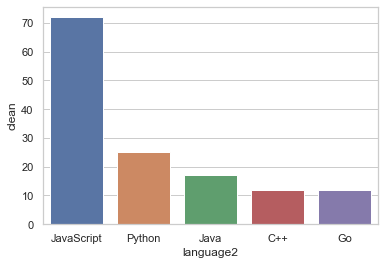

In [31]:
sns.set(style="whitegrid")
ax = sns.barplot(x="language2", y="clean", data=df3)

In [32]:
df2.head()

language  \
repo                                    
freeCodeCamp/freeCodeCamp  JavaScript   
996icu/996.ICU                   Rust   
vuejs/vue                  JavaScript   
facebook/react             JavaScript   
tensorflow/tensorflow             C++   

                                                             readme_contents  \
repo                                                                           
freeCodeCamp/freeCodeCamp  freecodecamporg social bannerhttpss3amazonawsc...   
996icu/996.ICU             996icuhttps996icuenu plea note that there exis...   
vuejs/vue                  p aligncentera hrefhttpsvuejsorg targetblank r...   
facebook/react             reacthttpsreactjsorg middot github licensehttp...   
tensorflow/tensorflow      div aligncent img srchttpswwwtensorfloworgimag...   

                                                                    original  \
repo                                                                           
freeCodeCamp/freeCodeCamp  freecodecamporg social bannerhttpss3amazonawsc...   
996icu/996.ICU             996icuhttps996icuenu plea note that there exis...   
vuejs/vue                  p aligncentera hrefhttpsvuejsorg targetblank r...   
facebook/react             reacthttpsreactjsorg middot github licensehttp...   
tensorflow/tensorflow      div aligncent img srchttpswwwtensorfloworgimag...   

                                                                     stemmed  \
repo                                                                           
freeCodeCamp/freeCodeCamp  freecodecamporg social bannerhttpss3amazonawsc...   
996icu/996.ICU             996icuhttps996icuenu plea note exist offici ac...   
vuejs/vue                  p aligncentera hrefhttpsvuejsorg targetblank r...   
facebook/react             reacthttpsreactjsorg middot github licensehttp...   
tensorflow/tensorflow      div alignc img srchttpswwwtensorfloworgimagest...   

                                                                  lemmatized  \
repo                                                                           
freeCodeCamp/freeCodeCamp  freecodecamporg social bannerhttpss3amazonawsc...   
996icu/996.ICU             996icuhttps996icuenu plea note exist offici ac...   
vuejs/vue                  p aligncentera hrefhttpsvuejsorg targetblank r...   
facebook/react             reacthttpsreactjsorg middot github licensehttp...   
tensorflow/tensorflow      div aligncent img srchttpswwwtensorfloworgimag...   

                                                                       clean  \
repo                                                                           
freeCodeCamp/freeCodeCamp  freecodecamporg social bannerhttpss3amazonawsc...   
996icu/996.ICU             996icuhttps996icuenu plea note exist offici ac...   
vuejs/vue                  p aligncentera hrefhttpsvuejsorg targetblank r...   
facebook/react             reacthttpsreactjsorg middot github licensehttp...   
tensorflow/tensorflow      div aligncent img srchttpswwwtensorfloworgimag...   

                                               repo2  
repo                                                  
freeCodeCamp/freeCodeCamp  freeCodeCamp/freeCodeCamp  
996icu/996.ICU                        996icu/996.ICU  
vuejs/vue                                  vuejs/vue  
facebook/react                        facebook/react  
tensorflow/tensorflow          tensorflow/tensorflow

In [33]:
corpus_complete = df2.clean.sum() #corpus is one big string
corpus_complete

"freecodecamporg social bannerhttpss3amazonawscomfreecodecampwidesocialbannerpng pull request welcomehttpsimgshieldsiobadgeprswelcomebrightgreensvgstyleflathttpmakeapullrequestcom firsttimersonli friendlyhttpsimgshieldsiobadgefirsttimersonlyfriendlybluesvghttpwwwfirsttimersonlycom open sourc helpershttpswwwcodetriagecomfreecodecampfreecodecampbadgesuserssvghttpswwwcodetriagecomfreecodecampfreecodecamp setup automatedhttpsimgshieldsiobadgesetupautomatedbluelogogitpodhttpsgitpodiofromreferr freecodecamporg ' opensourc codebas curriculum freecodecamporghttpswwwfreecodecamporg friendli commun learn code free run donorsupport 501c3 nonprofithttpsdonatefreecodecamporg help million busi adult transit tech commun ha alreadi help 10000 peopl get first develop job fullstack web develop curriculum complet free selfpac thousand interact code challeng help expand skill tabl content certificationscertif learn platformthelearningplatform report bug issuesreportingbugsandissu report secur issuesreport

#Individual corpus for top 5 languages

In [34]:
languages = ['JavaScript','Python','Java','C++','Go']
df2 = df2[df2.language.isin(languages)]

In [35]:
javascript_corpus = df2[df2.language == "JavaScript"].clean.sum()

In [36]:
python_corpus = df2[df2.language == "Python"].clean.sum()

In [37]:
java_corpus = df2[df2.language == "Java"].clean.sum()

In [38]:
c_double_plus_corpus = df2[df2.language == "C++"].clean.sum()

In [39]:
go_corpus = df2[df2.language == "Go"].clean.sum()

In [40]:
total_corpus = df2.clean.sum()
total_corpus

"freecodecamporg social bannerhttpss3amazonawscomfreecodecampwidesocialbannerpng pull request welcomehttpsimgshieldsiobadgeprswelcomebrightgreensvgstyleflathttpmakeapullrequestcom firsttimersonli friendlyhttpsimgshieldsiobadgefirsttimersonlyfriendlybluesvghttpwwwfirsttimersonlycom open sourc helpershttpswwwcodetriagecomfreecodecampfreecodecampbadgesuserssvghttpswwwcodetriagecomfreecodecampfreecodecamp setup automatedhttpsimgshieldsiobadgesetupautomatedbluelogogitpodhttpsgitpodiofromreferr freecodecamporg ' opensourc codebas curriculum freecodecamporghttpswwwfreecodecamporg friendli commun learn code free run donorsupport 501c3 nonprofithttpsdonatefreecodecamporg help million busi adult transit tech commun ha alreadi help 10000 peopl get first develop job fullstack web develop curriculum complet free selfpac thousand interact code challeng help expand skill tabl content certificationscertif learn platformthelearningplatform report bug issuesreportingbugsandissu report secur issuesreport

In [41]:
complete_words = corpus_complete.split()
complete_words

['freecodecamporg',
 'social',
 'bannerhttpss3amazonawscomfreecodecampwidesocialbannerpng',
 'pull',
 'request',
 'welcomehttpsimgshieldsiobadgeprswelcomebrightgreensvgstyleflathttpmakeapullrequestcom',
 'firsttimersonli',
 'friendlyhttpsimgshieldsiobadgefirsttimersonlyfriendlybluesvghttpwwwfirsttimersonlycom',
 'open',
 'sourc',
 'helpershttpswwwcodetriagecomfreecodecampfreecodecampbadgesuserssvghttpswwwcodetriagecomfreecodecampfreecodecamp',
 'setup',
 'automatedhttpsimgshieldsiobadgesetupautomatedbluelogogitpodhttpsgitpodiofromreferr',
 'freecodecamporg',
 "'",
 'opensourc',
 'codebas',
 'curriculum',
 'freecodecamporghttpswwwfreecodecamporg',
 'friendli',
 'commun',
 'learn',
 'code',
 'free',
 'run',
 'donorsupport',
 '501c3',
 'nonprofithttpsdonatefreecodecamporg',
 'help',
 'million',
 'busi',
 'adult',
 'transit',
 'tech',
 'commun',
 'ha',
 'alreadi',
 'help',
 '10000',
 'peopl',
 'get',
 'first',
 'develop',
 'job',
 'fullstack',
 'web',
 'develop',
 'curriculum',
 'complet',

In [42]:
javascript_words = javascript_corpus.split()
javascript_words

['freecodecamporg',
 'social',
 'bannerhttpss3amazonawscomfreecodecampwidesocialbannerpng',
 'pull',
 'request',
 'welcomehttpsimgshieldsiobadgeprswelcomebrightgreensvgstyleflathttpmakeapullrequestcom',
 'firsttimersonli',
 'friendlyhttpsimgshieldsiobadgefirsttimersonlyfriendlybluesvghttpwwwfirsttimersonlycom',
 'open',
 'sourc',
 'helpershttpswwwcodetriagecomfreecodecampfreecodecampbadgesuserssvghttpswwwcodetriagecomfreecodecampfreecodecamp',
 'setup',
 'automatedhttpsimgshieldsiobadgesetupautomatedbluelogogitpodhttpsgitpodiofromreferr',
 'freecodecamporg',
 "'",
 'opensourc',
 'codebas',
 'curriculum',
 'freecodecamporghttpswwwfreecodecamporg',
 'friendli',
 'commun',
 'learn',
 'code',
 'free',
 'run',
 'donorsupport',
 '501c3',
 'nonprofithttpsdonatefreecodecamporg',
 'help',
 'million',
 'busi',
 'adult',
 'transit',
 'tech',
 'commun',
 'ha',
 'alreadi',
 'help',
 '10000',
 'peopl',
 'get',
 'first',
 'develop',
 'job',
 'fullstack',
 'web',
 'develop',
 'curriculum',
 'complet',

In [43]:
python_words = python_corpus.split()
python_words

['englishreadmemd',
 'readmejamd',
 'readmezhhansmd',
 'readmezhtwmd',
 'httpsgithubcomdonnemartinsystemdesignprimerissues170',
 'httpsgithubcomdonnemartinsystemdesignprimerissues220',
 'portugu',
 'brasilhttpsgithubcomdonnemartinsystemdesignprimerissues40',
 'deutschhttpsgithubcomdonnemartinsystemdesignprimerissues186',
 'httpsgithubcomdonnemartinsystemdesignprimerissues130',
 'httpsgithubcomdonnemartinsystemdesignprimerissues272',
 'italianohttpsgithubcomdonnemartinsystemdesignprimerissues104',
 'httpsgithubcomdonnemartinsystemdesignprimerissues102',
 'httpsgithubcomdonnemartinsystemdesignprimerissues110',
 'polskihttpsgithubcomdonnemartinsystemdesignprimerissues68',
 'httpsgithubcomdonnemartinsystemdesignprimerissues87',
 'espanolhttpsgithubcomdonnemartinsystemdesignprimerissues136',
 'httpsgithubcomdonnemartinsystemdesignprimerissues187',
 'turkcehttpsgithubcomdonnemartinsystemdesignprimerissues39',
 'tieng',
 'viethttpsgithubcomdonnemartinsystemdesignprimerissues127',
 'francaisht

In [44]:
c_double_plus_words = c_double_plus_corpus.split()
c_double_plus_words

['div',
 'aligncent',
 'img',
 'srchttpswwwtensorfloworgimagestflogosocialpng',
 'div',
 'document',
 'documentationhttpsimgshieldsiobadgeapireferencebluesvghttpswwwtensorfloworgapidoc',
 'tensorflowhttpswwwtensorfloworg',
 'endtoend',
 'open',
 'sourc',
 'platform',
 'machin',
 'learn',
 'ha',
 'comprehens',
 'flexibl',
 'ecosystem',
 'toolshttpswwwtensorfloworgresourcestool',
 'librarieshttpswwwtensorfloworgresourceslibrariesextens',
 'communityhttpswwwtensorfloworgcommun',
 'resourc',
 'let',
 'research',
 'push',
 'stateoftheart',
 'ml',
 'develop',
 'easili',
 'build',
 'deploy',
 'mlpower',
 'applic',
 'tensorflow',
 'wa',
 'origin',
 'develop',
 'research',
 'engin',
 'work',
 'googl',
 'brain',
 'team',
 'within',
 'google',
 "'",
 'machin',
 'intellig',
 'research',
 'organ',
 'conduct',
 'machin',
 'learn',
 'deep',
 'neural',
 'network',
 'research',
 'system',
 'gener',
 'enough',
 'applic',
 'wide',
 'varieti',
 'domain',
 'well',
 'tensorflow',
 'provid',
 'stabl',
 'pyth

In [45]:
go_words = go_corpus.split()
go_words

['go',
 'program',
 'languag',
 'go',
 'open',
 'sourc',
 'program',
 'languag',
 'make',
 'easi',
 'build',
 'simpl',
 'reliabl',
 'effici',
 'softwar',
 'gopher',
 'imagedocgopherfiveyearsjpg',
 'gopher',
 'imag',
 'rene',
 'frenchrf',
 'licens',
 'creativ',
 'common',
 '30',
 'attribut',
 'licensecc3bi',
 'canon',
 'git',
 'repositori',
 'locat',
 'httpsgogooglesourcecomgo',
 'mirror',
 'repositori',
 'httpsgithubcomgolanggo',
 'unless',
 'otherwis',
 'note',
 'go',
 'sourc',
 'file',
 'distribut',
 'bsdstyle',
 'licens',
 'found',
 'licens',
 'file',
 'download',
 'instal',
 'binari',
 'distribut',
 'offici',
 'binari',
 'distribut',
 'avail',
 'httpsgolangorgdl',
 'download',
 'binari',
 'releas',
 'visit',
 'httpsgolangorgdocinstal',
 'load',
 'docinstallhtmldocinstallhtml',
 'web',
 'browser',
 'instal',
 'instruct',
 'instal',
 'sourc',
 'binari',
 'distribut',
 'avail',
 'combin',
 'oper',
 'system',
 'architectur',
 'visit',
 'httpsgolangorgdocinstallsourc',
 'load',
 'docins

In [46]:
java_words = java_corpus.split()
java_words

['div',
 'aligncent',
 'hrefhttpsgitstarrankingcomrepositori',
 'img',
 'srchttpsbadgennetbadgerank20icongithubcolor4ab8a1a',
 'hrefassetsdownloadmd',
 'img',
 'srchttpsbadgennetbadgeovoe7a6bbe7babfe4b88be8bdbdicontelegramcolor4ab8a1a',
 'hrefhttpscyc2018githubiocsnot',
 'img',
 'srchttpsbadgennetbadgecyce59ca8e7babfe99885e8afbbiconsourcegraphcolor4ab8a1a',
 'href',
 'img',
 'srchttpsbadgennetbadgee585ace4bc97e58fb7cyc2018iconrsscolor4ab8a1a',
 'div',
 'br',
 'nbspnbsp',
 'nbspnbsp',
 'nbspnbspnbspnbspnbspnbspnbspjavanbspnbspnbsp',
 'nbspnbspnbspnbspnbspnbsp',
 'nbspnbspnbspnbspnbspnbsp',
 'pencil2pencil2',
 'computercomput',
 'cloudcloud',
 'artart',
 'floppydiskfloppydisk',
 'coffeecoffeejava',
 'bulbbulb',
 'wrenchwrench',
 'watermelonwatermelon',
 'memomemo',
 'br',
 'div',
 'aligncent',
 'img',
 'srchttpscsnotes1256109796cosapguangzhoumyqcloudcomgithubiologomakr0zpeznpng',
 'width200px',
 'div',
 'br',
 'pencil2',
 'offer',
 'httpsgithubcomcyc2018csnotesblobmasternotes20offer20202

In [47]:
total_words = javascript_words + python_words + c_double_plus_words + go_words + java_words
total_words

['freecodecamporg',
 'social',
 'bannerhttpss3amazonawscomfreecodecampwidesocialbannerpng',
 'pull',
 'request',
 'welcomehttpsimgshieldsiobadgeprswelcomebrightgreensvgstyleflathttpmakeapullrequestcom',
 'firsttimersonli',
 'friendlyhttpsimgshieldsiobadgefirsttimersonlyfriendlybluesvghttpwwwfirsttimersonlycom',
 'open',
 'sourc',
 'helpershttpswwwcodetriagecomfreecodecampfreecodecampbadgesuserssvghttpswwwcodetriagecomfreecodecampfreecodecamp',
 'setup',
 'automatedhttpsimgshieldsiobadgesetupautomatedbluelogogitpodhttpsgitpodiofromreferr',
 'freecodecamporg',
 "'",
 'opensourc',
 'codebas',
 'curriculum',
 'freecodecamporghttpswwwfreecodecamporg',
 'friendli',
 'commun',
 'learn',
 'code',
 'free',
 'run',
 'donorsupport',
 '501c3',
 'nonprofithttpsdonatefreecodecamporg',
 'help',
 'million',
 'busi',
 'adult',
 'transit',
 'tech',
 'commun',
 'ha',
 'alreadi',
 'help',
 '10000',
 'peopl',
 'get',
 'first',
 'develop',
 'job',
 'fullstack',
 'web',
 'develop',
 'curriculum',
 'complet',

Word counts

In [48]:
corpus_complete_freq = pd.Series(complete_words).value_counts()


In [49]:
javascript_corpus_freq = pd.Series(javascript_words).value_counts()


In [50]:
python_freq = pd.Series(python_words).value_counts()


In [51]:
c_double_plus_freq = pd.Series(c_double_plus_words).value_counts()


In [52]:
java_freq = pd.Series(java_words).value_counts()


In [53]:
go_freq = pd.Series(go_words).value_counts()


In [54]:
total_freq = pd.Series(total_words).value_counts()


(-0.5, 399.5, 199.5, -0.5)

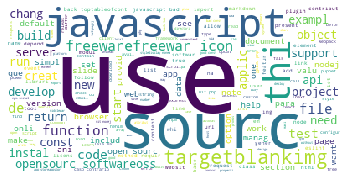

In [55]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords.words('english'), min_font_size = 10).generate(javascript_corpus)
img = WordCloud(background_color='white').generate(javascript_corpus)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

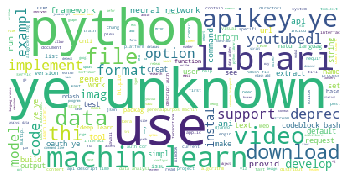

In [56]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords.words('english'), min_font_size = 10).generate(python_corpus)
img = WordCloud(background_color='white').generate(python_corpus)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

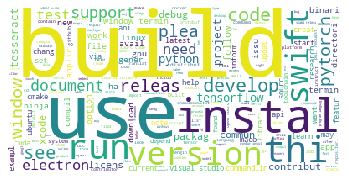

In [57]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords.words('english'), min_font_size = 10).generate(c_double_plus_corpus)
img = WordCloud(background_color='white').generate(c_double_plus_corpus)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

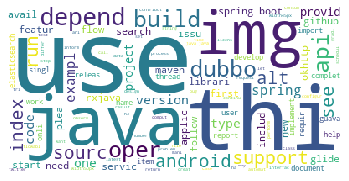

In [58]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords.words('english'), min_font_size = 10).generate(java_corpus)
img = WordCloud(background_color='white').generate(java_corpus)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

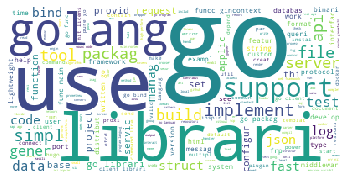

In [59]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords.words('english'), min_font_size = 10).generate(go_corpus)
img = WordCloud(background_color='white').generate(go_corpus)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

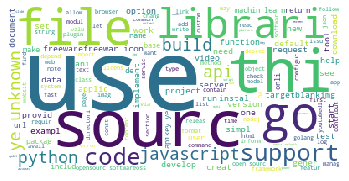

In [60]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords.words('english'), min_font_size = 10).generate(total_corpus)
img = WordCloud(background_color='white').generate(total_corpus)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')

In [61]:
word_counts = (pd.concat([total_freq, javascript_corpus_freq, python_freq, java_freq, c_double_plus_freq, go_freq], axis=1, sort=True)
                .set_axis(['Total', 'JavaScript', 'Python', 'Java', 'C++', 'Go'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts = word_counts.sort_values(by = 'Total', ascending = False)
word_counts['word'] = word_counts.index
word_counts

Total  JavaScript  Python  \
'                                                    3563        2541     654   
use                                                  1998        1079     468   
go                                                   1169         137      50   
sourc                                                1104         889      78   
javascript                                           1028         983      36   
librari                                               962         121     436   
thi                                                   925         534     193   
function                                              794         655      72   
file                                                  781         374     237   
python                                                772         145     588   
de                                                    747         746       1   
data                                                  738         189     432   
ye                                                    690           4     686   
code                                                  686         323     189   
api                                                   630         227     215   
build                                                 621         224      89   
support                                               582         215     142   
const                                                 578         575       0   
instal                                                573         269     173   
unknown                                               567           0     566   
learn                                                 521          79     397   
test                                                  512         292      90   
http                                                  506          82     253   
targetblankimg                                        474         474       0   
1                                                     470         346      62   
run                                                   468         245     103   
server                                                468         290      47   
web                                                   466         261      99   
creat                                                 439         272      92   
icon                                                  437         430       3   
...                                                   ...         ...     ...   
hasexistsscript                                         1           0       1   
hasgohttpsgithubcomdylanmeeushasgo                      1           0       0   
hashtag                                                 1           0       1   
haukhttpsgithubcombilde2910hauk                         1           1       0   
hattab                                                  1           1       0   
hatersforhat                                            1           0       1   
hater                                                   1           0       1   
hateoashttprestcookbookcombasicshateoa                  1           0       1   
hasval                                                  1           1       0   
hastichttpshasticio                                     1           1       0   
hastebinhttphastebincomaboutmd                          1           1       0   
hastebin                                                1           1       0   
hasownpropertyhttpsalligatoriojsdealingwithobject       1           1       0   
haskellmlhttpsgithubcomajtullochhaskellml               1           0       1   
haskellhaskel                                           1           0       1   
hashtabl                                                1           0       0   
hashchang                                               1           1       0   
hashsrcdatastructureshasht                              1           1       0   
ha

In [62]:
word_counts['perc'] = word_counts['Total']/len(word_counts)
word_counts.head()

Total  JavaScript  Python  Java  C++   Go        word      perc
'            3563        2541     654   174   69  125           '  0.098945
use          1998        1079     468    84   96  271         use  0.055485
go           1169         137      50     4    4  974          go  0.032463
sourc        1104         889      78    46   33   58       sourc  0.030658
javascript   1028         983      36     0    4    5  javascript  0.028548

In [63]:
word_counts.head()

Total  JavaScript  Python  Java  C++   Go        word      perc
'            3563        2541     654   174   69  125           '  0.098945
use          1998        1079     468    84   96  271         use  0.055485
go           1169         137      50     4    4  974          go  0.032463
sourc        1104         889      78    46   33   58       sourc  0.030658
javascript   1028         983      36     0    4    5  javascript  0.028548

Text(0.5, 1.0, 'IDF for a given word')

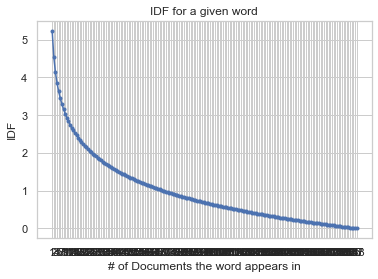

In [64]:
n_documents = 188

x = np.arange(1, n_documents + 1)
y = np.log(n_documents / x)


plt.plot(x, y, marker='.')

plt.xticks(x)
plt.xlabel('# of Documents the word appears in')
plt.ylabel('IDF')
plt.title('IDF for a given word')

In [65]:
words = total_corpus.split()
unique_words = pd.Series(words).unique()

In [66]:
blob = 'hi sean you cool ass sob you are so very cool hi hi sob'

In [67]:
def idf(word):
    n_occurences = sum([1 for doc in words if word in doc]) +1
    return len(df2.clean) / n_occurences

# Get a list of the unique words

In [68]:
# put the unique words into a data frame

df_unique = pd.DataFrame(dict(word = unique_words))
df_unique['idf'] = df_unique.word.apply(idf)
#.set_index('word').sort_values(by='idf', ascending=False).head(5)


# (pd.DataFrame(dict(word=unique_words))
 # calculate the idf for each word

 # sort the data for presentation purposes




In [80]:
df_unique.set_index('word', inplace = True) 


KeyError: 'word'

In [81]:
df_unique.head()

idf
word                                                         
freecodecamporg                                      1.604651
social                                               0.683168
bannerhttpss3amazonawscomfreecodecampwidesocial...  69.000000
pull                                                 1.150000
request                                              0.243386

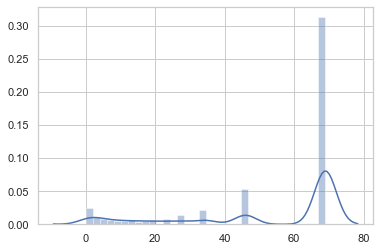

In [70]:
sns.distplot(df_unique)
plt.show()

In [71]:
df_unique.head()

idf
word                                                         
freecodecamporg                                      1.604651
social                                               0.683168
bannerhttpss3amazonawscomfreecodecampwidesocial...  69.000000
pull                                                 1.150000
request                                              0.243386

In [72]:
df_join = pd.merge(df_unique, word_counts, on ='word', how='left')
df_join.head()

word        idf  Total  \
0                                    freecodecamporg   1.604651    7.0   
1                                             social   0.683168   53.0   
2  bannerhttpss3amazonawscomfreecodecampwidesocia...  69.000000    1.0   
3                                               pull   1.150000   99.0   
4                                            request   0.243386  400.0   

   JavaScript  Python  Java   C++    Go      perc  
0         7.0     0.0   0.0   0.0   0.0  0.000194  
1        38.0    13.0   2.0   0.0   0.0  0.001472  
2         1.0     0.0   0.0   0.0   0.0  0.000028  
3        43.0    24.0   5.0  14.0  13.0  0.002749  
4       178.0   120.0  18.0  13.0  71.0  0.011108

In [73]:
df_join.idf.describe()

count    36014.000000
mean        52.674034
std         23.930214
min          0.001515
25%         34.500000
50%         69.000000
75%         69.000000
max         69.000000
Name: idf, dtype: float64

In [74]:
df_join2 = df_join[df_join.idf <138]
df_join.head()

word        idf  Total  \
0                                    freecodecamporg   1.604651    7.0   
1                                             social   0.683168   53.0   
2  bannerhttpss3amazonawscomfreecodecampwidesocia...  69.000000    1.0   
3                                               pull   1.150000   99.0   
4                                            request   0.243386  400.0   

   JavaScript  Python  Java   C++    Go      perc  
0         7.0     0.0   0.0   0.0   0.0  0.000194  
1        38.0    13.0   2.0   0.0   0.0  0.001472  
2         1.0     0.0   0.0   0.0   0.0  0.000028  
3        43.0    24.0   5.0  14.0  13.0  0.002749  
4       178.0   120.0  18.0  13.0  71.0  0.011108

In [75]:
df_join2.idf.describe()

count    36014.000000
mean        52.674034
std         23.930214
min          0.001515
25%         34.500000
50%         69.000000
75%         69.000000
max         69.000000
Name: idf, dtype: float64

In [76]:
df_join3 = df_join[(df_join.idf > 68) & (df_join.idf <69)].shape

(0, 9)